In [88]:
import numpy as np  
import time

import tensorflow as tf
from tensorflow import keras
from keras.optimizers import Adam
from sklearn import datasets
from sklearn.model_selection import train_test_split



In [89]:


# Generate a regression dataset with 100 samples, 100 features, and 4 informative features
X, Y = datasets.make_classification (n_samples=100, n_features=2, n_classes = 2, n_informative = 2, n_redundant =  0, n_repeated= 0)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.33 , random_state=42)


```
1: Begin 
2: // Initialization 
3: g ←0; // the generation index 
4: Initialize population Xg and evaluate the fitness; 
5: Initialize the weights of ANN randomly; 
6: Initialize arch as an empty set; // to store solution pairs 
7: While stop criteria not satisfied Do 
8: g ←g + 1; 
9: // Individual Evolution 
10: Sample r uniformly on [0,1]; 
11: If g >1 and r< lp Then 
12: newX ← Evolve Xg by learning-aided evolutionary operator; 
13: Else 
14: // use operators in traditional EC, e.g., PSO or DE 
15: newX ← Evolve Xg by traditional evolutionary operator; 
16: End If
17: Evaluate the fitness of individuals in newX; 
18: // Selection 
19: Xg+1 ← selection among Xg and newX; 
20: // SEP Collection 
21: For each individual i in Xg+1 Do 
22: If Xg+1,i is better than Xg,i Then 
23: Add (Xg,i, Xg+1,i) in arch; 
24: End If 
25: End For 
26: If number of SEPs in arch > arch_size Then 
27: arch ← the newest arch_size solution pairs; 
28: End If 
29: // Learning System Update 
30: Train the ANN with all data in arch for one epoch; 
31: End While 
32: End 
```

In [90]:
class static_list:
    def __init__(self, volume: int) -> None:
        self.volume = volume
        self.x = list()
        pass
    def __str__(self) -> str:
        return f"{self.x}"
    def __repr__(self) -> str:
        return f"static_list({self.x})"
    
    def add(self, value):
        if len(self.x) == self.volume:
            self.x.append(  value )
            self.x.pop(0)
        else :
            self.x.append(  value )
        self.__repr__()
        pass
    def append(self, value):
        self.add(value)
        
    def to_list(self) -> list:
        return self.x


class static_dict:
    def __init__(self, volume: int) -> None:
        self.volume = volume
        self.x = dict()
        pass
    def __str__(self) -> str:
        return f"{self.x}"
    def __repr__(self) -> str:
        return f"static_dict({self.x})"
    
    def add(self, value : tuple):
        if len(self.x) == self.volume:
            self.x[value[0]] =  value[1]
            self.x.pop( list(self.x.keys()) [0])
        else :
            self.x[value[0]] =  value[1]

        self.__repr__()
        pass
    def append(self, value):
        self.add(value)

In [91]:
def evaluate_fitness(function, *args, **kwargs):

  start_time = time.time()
  LX = function(*args, **kwargs)
  end_time = time.time()
  time_delay = (end_time - start_time) * 1000 
  return time_delay , LX

In [92]:
def initialize_ANN_weights_randomly(xtrain):
    # Define hyperparameters
    hidden_size = 10  # Adjust this for your desired hidden layer size
    output_size = 1  # Adjust this for your desired output size

# Create the model
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(hidden_size, activation='relu', input_shape=(xtrain.shape[1],)),
        tf.keras.layers.Dense(output_size)
    ])

    model.compile(optimizer=Adam(.1), loss='mse')
    return model

In [93]:
class kerasModel:
    def __init__(self) -> None:
        pass
    def __str__(self) -> str:
        return "kerasModel"
    def __repr__(self) -> str:
        return self.__str__()

In [94]:

def train_ANN(model, X_train, y_train) -> kerasModel:
    m = initialize_ANN_weights_randomly(X_train)  # Assuming you have defined this function
    for i, e in enumerate(model.layers):
        m.layers[i].set_weights(model.layers[i].get_weights())

    m.compile(optimizer=Adam(0.1), loss='mse')  # Corrected the learning rate
    hist = m.fit(X_train, y_train, epochs=1, verbose=False)
    return m


In [95]:
# Placeholder functions for specific implementations
def initialize_population(first_gen_size):
    resuls_dict = dict()
    model = initialize_ANN_weights_randomly(X_train)
    for _ in range(first_gen_size):
        ff , x = evaluate_fitness(train_ANN,model, X_train , y_train)
        resuls_dict[ff] = x
    return resuls_dict

In [96]:
def MSE(arch_size, Lx, X):
    summ = np.sum(np.abs(Lx - X) ** 2)
    return (1/arch_size) * summ

In [97]:
def cross_over(X_A, X_B, beta):
    if np.random.rand() <= beta:
        return X_A
    else:
        return X_B
    
def mutation(X_A, X_B,X_C, alpha):
    model = initialize_ANN_weights_randomly(X_train)
    X_A = X_A.get_weights()
    X_B = X_B.get_weights()
    X_C = X_C.get_weights()
    updated_weights = [a + alpha * ( b - c) for a,b ,c in zip(X_A, X_B, X_C) ]
    for i in range(len(model.layers)):
        
        updated_weights[i] = updated_weights[i].reshape(-1,1) if len(updated_weights[i].shape) == 1 else updated_weights[i]

        model.layers[i].set_weights( (updated_weights[i], 
                                      model.layers[i].get_weights()[1]) )

    return model
    

In [98]:
def learning_aided_evolution(Xg, alpha, beta):
    Xg = list(Xg.values())
    leo_result = dict()
    for i in range(1, len(Xg) ):
        LC = cross_over(Xg[1-i] , Xg[i ], beta)
        ff , x = evaluate_fitness(train_ANN,LC, X_train , y_train)
        leo_result[ff] = x

    for i in range(2, len(Xg) ):
        LM = mutation( Xg[i - 2], Xg[i - 1], Xg[i], alpha)
        ff , x = evaluate_fitness(train_ANN, LM , X_train , y_train)
        leo_result[ff] = x
    
    return leo_result

In [99]:
def is_better(individual1, individual2):

    if individual1 < individual2:
        return True
    else:
        return False

In [100]:
def selection(Xg :dict, newX : dict):
    selected = dict()
    for i in range(len(Xg)):
        if is_better(list(Xg.keys())[i], list(newX.keys())[i ]):   
            selected[list(Xg.keys())[i]] = list(Xg.values())[i]
        else:
            selected[list(newX.keys())[i]] = list(newX.values())[i]

    return selected

In [101]:
# import scipy.stats as stats

# # Sample data (adjust according to your data)
# sample1 = [10, 12, 8, 15, 9]
# sample2 = [11, 14, 6, 18, 13]

# # One-sided test (alternative hypothesis: sample1 > sample2)
# statistic, pvalue = stats.wilcoxon(sample1, sample2, alternative='greater')
# print("One-sided p-value:", pvalue)

# # Two-sided test (alternative hypothesis: not equal medians)
# statistic, pvalue = stats.wilcoxon(sample1, sample2, alternative='two-sided')
# print("Two-sided p-value:", pvalue)

# # Interpretation:
# # if pvalue < 0.05 (common significance level), reject the null hypothesis (no difference) and conclude that there's a statistically significant difference between the samples.

# # Additional steps:
# # - Consider Bonferroni correction for multiple comparisons.
# # - Visualize data distributions and rank differences for deeper insights.


In [102]:
# import pandas as pd
# from scipy.stats import friedmanchisquare
# from scikit_posthocs import posthoc_nemenyi

# # Create a pandas DataFrame with your data (replace with your actual data)
# df = pd.DataFrame({
#     'Group1': [1, 2, 3],
#     'Group2': [2, 3, 4],
#     'Group3': [3, 4, 5],
#     # Add more groups if needed
# })

# # Perform the Friedman test
# friedman_result = friedmanchisquare(df['Group1'].to_numpy()
#                                     ,df['Group2'].to_numpy()
#                                     ,df['Group3'].to_numpy())

# # If significant, proceed with post-hoc analysis
# if friedman_result.pvalue < 0.05:
#     posthoc_result = posthoc_nemenyi(df)
#     print(posthoc_result)
# else:
#     print("No significant differences detected.")


In [103]:
# # Import necessary libraries
# import numpy as np
# import tensorflow as tf

# # Define the Learning-Aided Evolution for Optimization (LEO) class
# class LEO:
#     def __init__(self, input_dim, output_dim):
#         self.input_dim = input_dim
#         self.output_dim = output_dim
#         self.model = self.build_model()

#     # Build the artificial neural network (ANN) model
#     def build_model(self):
#         model = tf.keras.Sequential([
#             tf.keras.layers.Dense(64, activation='relu', input_shape=(self.input_dim,)),
#             tf.keras.layers.Dense(64, activation='relu'),
#             tf.keras.layers.Dense(self.output_dim)
#         ])
#         model.compile(optimizer='adam', loss='mean_squared_error')
#         return model

#     # Train the ANN with successful solution pairs
#     def train(self, X, y):
#         self.model.fit(X, y, epochs=10, batch_size=32, verbose = False)

#     # Use the trained ANN to aid the evolutionary process
#     def evolve(self, input_solution):
#         evolved_solution = self.model.predict(input_solution)
#         return evolved_solution

# # Example usage
# # Initialize LEO with input and output dimensions
# input_dim = 10  # Example input dimension
# output_dim = 1  # Example output dimension
# leo = LEO(input_dim, output_dim)

# # Generate successful solution pairs (X, y)
# X = np.random.rand(100, input_dim)  # Example input data
# y = np.random.rand(100, output_dim)  # Example output data


# # Train LEO with successful solution pairs
# d = evaluate_fitness(leo.train, X , y)
# # leo.train(X, y)
# print("d ", d)
# # Use LEO to aid the evolutionary process
# input_solution = np.random.rand(1, input_dim)  # Example input solution
# evolved_solution = leo.evolve(input_solution)
# print(evolved_solution)

In [104]:
# import random
# import tensorflow as tf
# from tensorflow import keras
# from keras.optimizers import Adam

# arch_size = 100
# lp = None
# generation = 10

# alpha = .5
# beta = .9

# def main():
#     g = 0  # Generation index
#     Xg = initialize_population()  # Initialize population and evaluate fitness
#     ANN = initialize_ANN()  # Initialize ANN weights randomly
#     arch = static_dict(arch_size)  # Archive to store solution pairs

#     for _ in range(generation):
#         g += 1

#         # Individual Evolution
#         r = random.random()
#         if g > 1 and r < lp:
#             newX = learning_aided_evolution(Xg)
#         else:
#             newX = traditional_evolution(Xg)

#         evaluate_fitness(newX)

#         # Selection
#         Xg = selection(Xg, newX)

#         # SEP Collection
#         for i in range(len(Xg)):
#             if is_better(Xg[i], Xg_prev[i]):  # Assuming Xg_prev is accessible
#                 arch.append((Xg_prev[i], Xg[i]))

#         # if len(arch) > arch_size:
#         #     arch = arch[-arch_size:]  # Keep newest arch_size pairs

#         # Learning System Update
#         train_ANN(ANN, arch)

#         Xg_prev = Xg  # Store Xg for next iteration

# # Placeholder functions for specific implementations
# def initialize_population():
#     # ...
#     pass

# def initialize_ANN():
#     # Define hyperparameters
#     input_size = 1  # Adjust this for your actual input size
#     hidden_size = 10  # Adjust this for your desired hidden layer size
#     output_size = 1  # Adjust this for your desired output size

# # Create the model
#     model = tf.keras.Sequential([
#         tf.keras.layers.Dense(hidden_size, activation='relu', input_shape=(input_size,)),
#         tf.keras.layers.Dense(output_size)
#     ])

#     # Compile the model
#     model.compile(optimizer=Adam(.1), loss='mse', metrics=['mae'])


# def learning_aided_evolution(Xg):

#     # ...
#     pass

# def traditional_evolution(Xg):
#     # ...
#     pass

# def evaluate_fitness(function, *args, **kwargs):
#   start_time = time.time()
#   function(*args, **kwargs)
#   end_time = time.time()
#   time_delay = (end_time - start_time) * 1000 
#   return time_delay

# def selection(Xg, newX):
#     # ...
#     pass

# def is_better(individual1, individual2):
#     # ...
#     pass

# def train_ANN(ANN, arch):
#     # ...
#     pass

# if __name__ == "__main__":
#     main()


In [105]:
# def ETR(A, B):
#   """
#   Calculates the error reduction versus time increase rate (ETR) between two algorithms.

#   Args:
#     A: Dictionary containing information about algorithm A, including:
#       - `error`: The optimization error of algorithm A.
#       - `time`: The computational time cost of algorithm A.
#     B: Dictionary containing information about algorithm B, including:
#       - `error`: The optimization error of algorithm B.
#       - `time`: The computational time cost of algorithm B.

#   Returns:
#     The ETR value of algorithm A over B, or None if B's error is better than A's.
#   """

#   # Check if algorithm B has a better error than A
#   if B["error"] <= A["error"]:
#     return None

#   # Calculate error reduction rate
#   err_reduction_rate = (A["error"] - B["error"]) / B["error"] * 100

#   # Calculate time increase rate
#   time_increase_rate = (A["time"] - B["time"]) / B["time"] * 100

#   # Check for division by zero
#   if time_increase_rate == 0:
#     return None

#   # Calculate ETR
#   return err_reduction_rate / time_increase_rate

# # Example usage
# algorithm_a = {"error": 0.2, "time": 100}
# algorithm_b = {"error": 0.5, "time": 50}

# etr_value = ETR(algorithm_a, algorithm_b)

# if etr_value is not None:
#   print(f"ETR of algorithm A over B: {etr_value:.2f}%")
# else:
#   print("Algorithm B has a better error, ETR cannot be calculated.")


In [106]:
def main():
    g = 0 
    arch_size = 10
    lp = 1.
    generation = 10
    first_gen_size = 10
    alpha = .5 # cross-over rate
    beta = .5 # mutation rate
    g = 0  # Generation index
    Xg  : dict = initialize_population(first_gen_size)  # Initialize population and evaluate fitness
    ANN = initialize_ANN_weights_randomly(X_train)  # Initialize ANN weights randomly
    archive = static_list(arch_size)  # Archive to store solution pairs
    
    newX = Xg
    
    for _ in range(generation):
        g += 1
        r = np.random.rand()
        if g > 1 and r < lp:
            newX :dict = learning_aided_evolution(Xg, alpha=alpha, beta=beta)
            pass
        else:
            pass

#       # Selection
        Xg = selection(Xg, newX)
        
#        # SEP Collection
        for i in range(len(Xg) - 1) :
            
            if is_better(list(Xg.keys())[i+1], list(Xg.keys())[i ]):  
                archive.append((list(Xg.values())[i + 1], list(Xg.values())[i]))
                
        all_models = list()
 
        for m1, m2 in archive.to_list():
            model1 = train_ANN(m1, X_train, y_train)
            model2 = train_ANN(m2, X_train, y_train)
            all_models.append(model1)
            all_models.append(model2)
            

        total_loss = list()
        for MODEL in all_models:

            lx = MODEL.predict(X_test)
 
            total_loss .append( MSE(arch_size, lx, y_test))
    
    resluts = {k : v for k, v in zip( total_loss , all_models)}
    
    return resluts


In [107]:
res = main()

2/2 [==============================] - 0s 4ms/step


In [108]:
res

{48.36476245444416: <keras.src.engine.sequential.Sequential at 0x1b47de31ab0>,
 59.789061028876745: <keras.src.engine.sequential.Sequential at 0x1b47f103f40>,
 46.3577500268407: <keras.src.engine.sequential.Sequential at 0x1b47f209d50>,
 36.257088730410665: <keras.src.engine.sequential.Sequential at 0x1b47f2f09d0>,
 66.57799407820485: <keras.src.engine.sequential.Sequential at 0x1b47f3b91b0>,
 42.108992397837: <keras.src.engine.sequential.Sequential at 0x1b480468520>,
 39.84821939847487: <keras.src.engine.sequential.Sequential at 0x1b48053aa40>,
 51.057715344111436: <keras.src.engine.sequential.Sequential at 0x1b4806281c0>,
 36.82695758288622: <keras.src.engine.sequential.Sequential at 0x1b4816c26e0>,
 42.003494704688684: <keras.src.engine.sequential.Sequential at 0x1b4817976d0>,
 55.2451153250962: <keras.src.engine.sequential.Sequential at 0x1b4818a68f0>,
 60.19931891797328: <keras.src.engine.sequential.Sequential at 0x1b4819525c0>,
 40.168122782005625: <keras.src.engine.sequential.Se

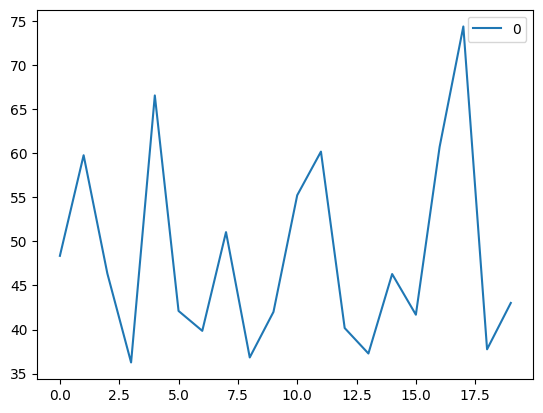

In [109]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.lineplot(res.keys())
plt.show()